## Examples : Answers

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [43]:
conn = sqlite3.connect('chinook.db')

In [303]:
genres = pd.read_sql('select * from genres', conn)
tracks = pd.read_sql('select * from tracks', conn)
invoice_items = pd.read_sql('select * from invoice_items', conn)
invoices = pd.read_sql('select * from invoices', conn)

In [304]:
df = invoices.merge(invoice_items, left_on='InvoiceId', right_on='InvoiceId', how = 'left')\
.merge(tracks, left_on= 'TrackId', right_on='TrackId', how = 'left')\
.merge(genres, left_on= 'GenreId', right_on= 'GenreId',how = 'left').loc[:,['BillingCountry','Name_y','Total']]

In [305]:
df.head()

,BillingCountry,Name_y,Total
0,Germany,Rock,1.98
1,Germany,Rock,1.98
2,Norway,Rock,3.96
3,Norway,Rock,3.96
4,Norway,Rock,3.96


In [311]:
df2 = pd.pivot_table(df,index = 'BillingCountry', columns='Name_y',values = 'Total', aggfunc = sum)
df2 = df2.fillna(0)

In [312]:
df2.head()

Name_y,Alternative,Alternative & Punk,Blues,Bossa Nova,Classical,Comedy,Drama,Easy Listening,Electronica/Dance,Heavy Metal,...,Pop,R&B/Soul,Reggae,Rock,Rock And Roll,Sci Fi & Fantasy,Science Fiction,Soundtrack,TV Shows,World
BillingCountry,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,80.19,0.00,0.0,0.00,0.0,0.00,27.72,0.0,0.00,...,0.00,0.00,0.00,81.18,0.0,0.00,0.0,13.86,0.00,0.00
Australia,0.0,0.00,13.86,0.0,0.00,0.0,0.00,0.00,0.0,41.58,...,0.00,0.00,17.82,170.28,0.0,0.00,0.0,0.00,0.00,0.00
Austria,0.0,0.00,0.00,0.0,11.88,0.0,18.86,0.00,0.0,0.00,...,5.94,18.81,0.00,203.40,0.0,0.00,0.0,0.00,75.44,0.00
Belgium,0.0,119.79,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.00,3.96,0.00,209.88,0.0,0.00,0.0,0.00,0.00,0.00
Brazil,0.0,71.28,30.69,0.0,39.60,0.0,0.00,0.00,0.0,0.00,...,36.63,29.70,83.16,691.02,0.0,7.96,0.0,55.44,0.00,27.72


In [313]:
# Q1: Make a barplot to compare Brasil and Argentina for each genre

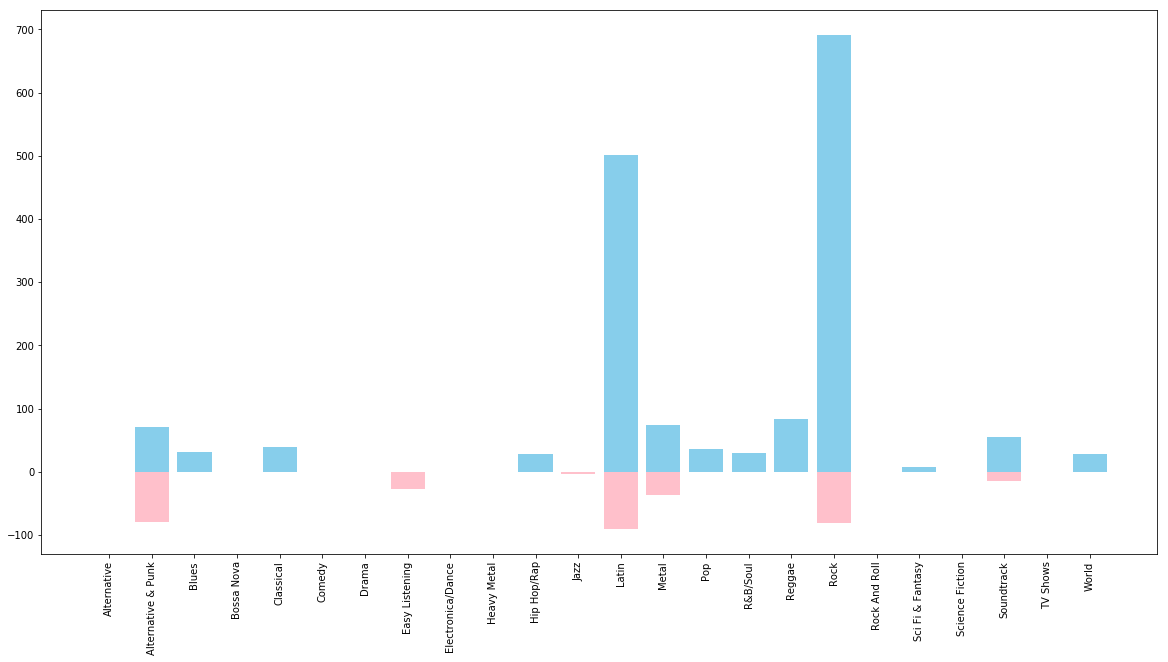

In [314]:
plt.figure(figsize=(20,10))
plt.bar(range(len(df2.columns)),df2.loc['Brazil',:], facecolor='skyblue')
plt.bar(range(len(df2.columns)),-df2.loc['Argentina',:], facecolor='pink')
plt.xticks(list(range(len(df2.columns))),list(df2.columns), rotation = 90)
plt.show()

In [315]:
europe = ['Austria','Belgium','Czech Republic','Denmark','Finland','France','Germany','Hungary','Ireland',\
          'Italy','Netherlands', 'Norway','Poland', 'Portugal', 'Spain', 'Sweden','United Kingdom']

In [316]:
ncol = len(df3.columns)

In [317]:
prop = [sum(df3.loc[europe,df3.columns[i]])/sum(df3.loc[:,df3.columns[i]]) for i in range(ncol)]

In [ ]:
# Q2: Make a bar plot showing the proportion of Europe over 

[]

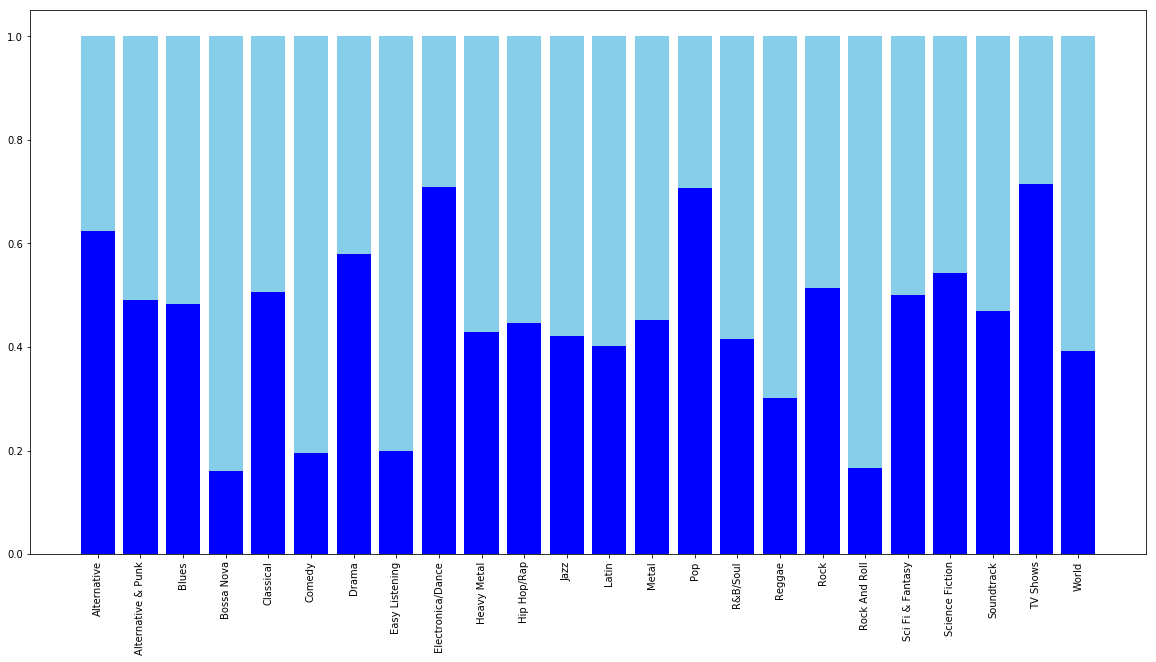

In [325]:
plt.figure(figsize=(20,10))
plt.bar([i for i in range(ncol)],prop, color = 'blue')
plt.bar([i for i in range(ncol)],[1-i for i in prop] , bottom = prop, color = 'skyblue' )
plt.xticks(list(range(len(df2.columns))),list(df2.columns), rotation = 90)
plt.plot()

In [171]:
tips = sns.load_dataset("tips")

In [179]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Q3: Plot the column tip with regard to total_bill and plot the linear regression 

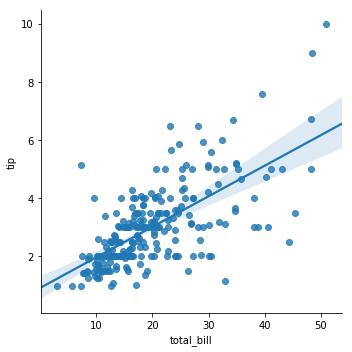

In [173]:
g = sns.lmplot(x="total_bill", y="tip", data=tips)

In [ ]:
#Q4 : same question as Q3 but use two different colors for smokers and non smokers

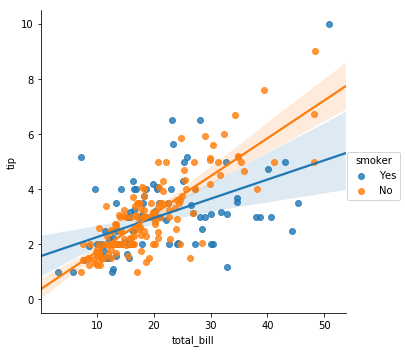

In [174]:
g = sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data=tips)